# Iris Species Classifcation

This famous dataset demonstrates classifying the species of an Iris flower based on measurements of the flower such as the length and width of the petal and sepal.

The input features are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

The target feature is the species of the flower, of which there are three classes:
* Iris Setosa
* Iris Versicolour
* Iris Virginica

One class is linearly separable from the other 2, the other classses are not linearly separable.

Sources and further learning:
* http://archive.ics.uci.edu/ml/datasets/iris
* https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset
* https://www.kaggle.com/uciml/iris

<p><a href="https://commons.wikimedia.org/wiki/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg#/media/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/1200px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg" alt="Iris germanica (Purple bearded Iris), Wakehurst Place, UK - Diliff.jpg" width="300" height="300"></a><br>By <a href="//commons.wikimedia.org/wiki/User:Diliff" title="User:Diliff">Diliff</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=33037509">Link</a></p>


In [1]:
import pandas
import matplotlib
import matplotlib.pyplot
import sklearn.datasets
import sklearn.model_selection
import sklearn.preprocessing
%matplotlib inline

In [2]:
# some constants
num_classes = 3
input_features = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)']
target_feature = 'species'

In [3]:
data = sklearn.datasets.load_iris()

In [4]:
iris_df_raw = pandas.read_csv('iris.csv', names=(input_features + [target_feature]))

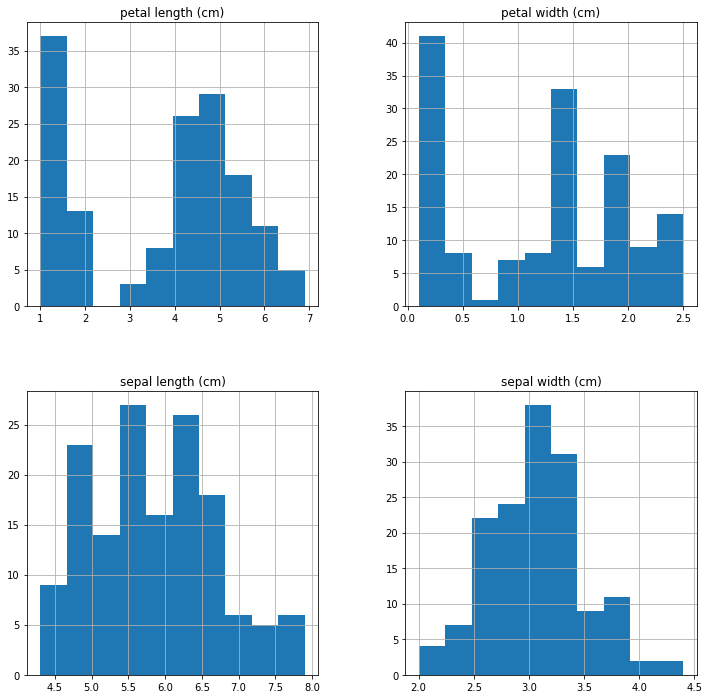

In [5]:
_ = iris_df_raw[input_features[:4]].hist(figsize=(12,12))

<BarContainer object of 3 artists>

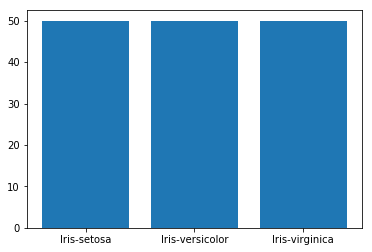

In [6]:
fig1 = matplotlib.pyplot.figure('species_dist')
ax1 = fig1.add_subplot(111)
ax1.bar(list(iris_df_raw.species.unique()), (iris_df_raw.species.value_counts().values))

In [7]:
species_encoder = sklearn.preprocessing.LabelEncoder()
species_encoder.fit(iris_df_raw.species)
species_encoded = pandas.DataFrame(species_encoder.transform(iris_df_raw.species), columns=[target_feature])


input_normaliser = sklearn.preprocessing.StandardScaler()
input_normaliser.fit(iris_df_raw[input_features])
inputs_scaled = pandas.DataFrame(input_normaliser.transform(iris_df_raw[input_features]),columns=input_features)

iris_df_ml = pandas.concat([inputs_scaled, species_encoded],axis=1)

In [8]:
iris_df_ml

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [9]:
(X_train, X_test,
 y_train, y_test) = sklearn.model_selection.train_test_split(
    iris_df_ml[input_features], iris_df_ml[target_feature], test_size=0.2)
